In [62]:
import numpy as np
import matplotlib.pyplot as plt

**1. Полиномиальная регрессия**

In [63]:
def compute_polynomial_coeffs(x, y):
    n = len(x)
    a = np.zeros((n, n))
    b = y
    for i in range(n):
        a[:, i] = x ** i 
    return np.linalg.solve(a, b)


def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

График полиномиальной аппроксимации при n=5.

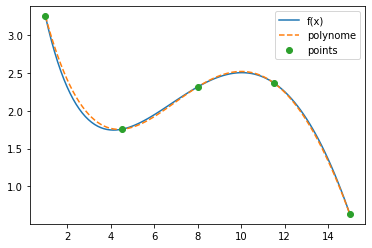

In [64]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)


n = 5
x = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)

w = compute_polynomial_coeffs(x_points, y_points)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, polynome(w, x), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

График полиномиальной аппроксимации при n=15.

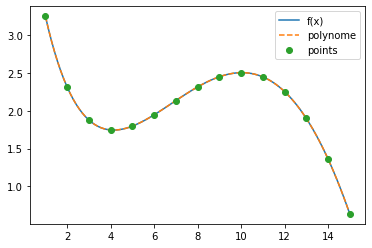

In [65]:
n = 15
x = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)

w = compute_polynomial_coeffs(x_points, y_points)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, polynome(w, x), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

Чем выше степень полинома, тем точнее приближение.

**2. Полиномиальная регрессия с зашумленными данными**

График полиномиальной аппроксимации при n=5.

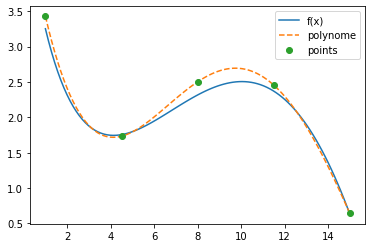

In [71]:
n = 5
noise = 0.1
x = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, polynome(w, x), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

График полиномиальной аппроксимации при n=15.

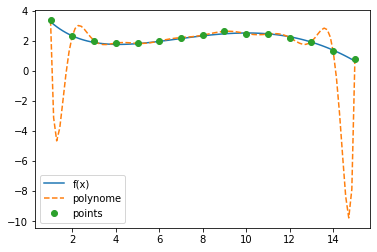

In [36]:
n = 15
noise = 0.1
x = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, polynome(w, x), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

**3. Метод наименьших квадратов**

In [72]:
def compute_polynomial_coeffs_2(x, y, n):
    a = np.zeros((len(x), n + 1))
    b = y
    for i in range(n + 1):
        a[:, i] = x ** i
    inverse_a = np.linalg.pinv(a)
    return np.dot(inverse_a, b)

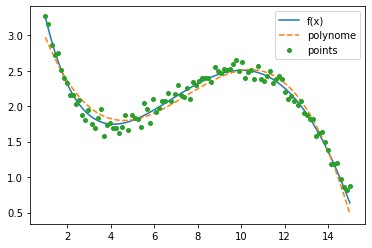

In [77]:
x = np.linspace(1, 15, 100)
noise = 0.1
y_points = f(x) + np.random.randn(100) * noise

w = compute_polynomial_coeffs_2(x, f(x), 3)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, polynome(w, x), '--', label='polynome')
plt.plot(x, y_points, 'o', label='points', markersize=4)
plt.legend()

Приближение, полученное с помощью метода наименьших квадратов, оказалось достаточно точным, несмотря на зашумленные данные.